In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from scipy import stats 
import env
import wrangle
import explore
from itertools import combinations


# Executive Summary

# The plan for this presentation: 
- Attempt to explain what factors can be used to predict the tax value dollar count of single family residential units by doing the following:
    - Acquire and prepare the data
    - Explore the different factors that could contribute to the tax value dollar amount
    - Test different models
    - Offer final recommendations 

# Acquiring and Preparing the data

### This wrangle function acquires the data and prepares it by doing the following:

- acquires Single Family Residential units from the properties_2017, propertylandusetype, and predictions_2017 tables, which was taken from the Zillow database
- drops the na values to get rid of nulls 
- converts the columns bedroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, and yearbuilt to int columns
- gets rid of properties that have zero bedrooms or more than 6 bedrooms
- gets rid of properties that have zero bathrooms or more than 6 bathrooms
- gets rid of properties where the tax value dollar count exceeds 4,000,000
- gets rid of properties where the calculated finished square feet is over 100,000
- adds a fips two colummn that gives the name of the county that is represented by the fips number: 
    - 6037 = LA 
    - 6059 = Orange 
    - 6111 = Ventura
- adds an age column, that gives the age of the property in years

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid,age,fips2
0,4,2.5,2490,691000,1969,7138.64,Orange,14381521,53,6059
1,4,2.0,1808,241131,1980,3589.81,LA,11108702,42,6037
2,4,2.0,1878,94598,1965,1415.77,LA,10728687,57,6037
3,4,2.0,1207,380736,1964,3869.62,Orange,14376191,58,6059
4,2,1.0,728,33497,1925,974.63,LA,12391744,97,6037


In [4]:
df.shape


(51702, 10)

In [5]:
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
parcelid                        0
age                             0
fips2                           0
dtype: int64

<div class="alert alert-block alert-success">
<b>Success:</b> All data was pulled and prepared as expected.
</div>

# Split the Data

In [6]:
# This function pulls from the wrangle.py file and splits the data into train, validate, and test
# This will be used in the exploration

train, validate, test = wrangle.split_zillow_data(df)

train.shape, validate.shape, test.shape

((28952, 10), (12409, 10), (10341, 10))

In [25]:
# we will go ahead and scale the data to use later on for the machine learning portion
train_s, validate_s, test_s = wrangle.data_scaled(train, validate, test, columns_to_scale=(df.drop(columns = ['fips', 'taxvaluedollarcnt']).columns))
train_s.shape, validate_s.shape, test_s.shape

((28952, 10), (12409, 10), (10341, 10))

In [26]:
# Stratify with taxvaluedollarcnt using the scaled data
X_train = train_s.drop(columns=["taxvaluedollarcnt"])
y_train = train_s.taxvaluedollarcnt

X_validate = validate_s.drop(columns=["taxvaluedollarcnt"])
y_validate = validate_s.taxvaluedollarcnt

X_test = test_s.drop(columns=["taxvaluedollarcnt"])
y_test = test_s.taxvaluedollarcnt

<div class="alert alert-block alert-success">
<b>Success:</b> Data was split into train, validate, test samples as expected.
</div>

# Exploration


### What factors can be used to help predict the tax value dollar count of single family residential homes?

#### The target variable is tax value dollar count
### Hypotheses
- county (fips) has a strong relationship with tax value dollar count (tvd)
- calculated finished square feet (sqft) has a strong relationship with tvd
- newer homes have a higher tvd 
- homes with more bedrooms and bathrooms have a higher tvd (probably has a strong correlation with sqft
- LA county has the highest value homes, followed by Orange county and then Ventura county


<div class="alert alert-block alert-warning">
<b>The target variable is tax value dollar count</b>
    
<b>Hypotheses:</b> 

- county (fips) has a strong relationship with tax value dollar count (tvd)
    
- calculated finished square feet (sqft) has a strong relationship with tvd
    
- newer homes have a higher tvd 
    
- homes with more bedrooms and bathrooms have a higher tvd (probably has a strong correlation with sqft
    
- LA county has the highest value homes, followed by Orange county and then Ventura county
</div>

In [9]:
# first lets see what columns may be correlated to our target variable
columns_corr = train.corr()
columns_corr.taxvaluedollarcnt

bedroomcnt                      0.277196
bathroomcnt                     0.533649
calculatedfinishedsquarefeet    0.602603
taxvaluedollarcnt               1.000000
yearbuilt                       0.221701
taxamount                       0.982508
parcelid                        0.030878
age                            -0.221701
fips2                           0.059124
Name: taxvaluedollarcnt, dtype: float64

- Takeaways: 

- When looking at the tax value dollar count, we can see that it is strongly related to tax amount. This strong of a relationship would skew our analysis, so when looking for our target variable we will be ignoring the tax amount. 
- We can also see that year built and age are inverses of each other, so we won't be using both of these factors at the same time. 

In [10]:
# Here I am going to create 3 different variables. The first (or base) will contain just the bathroom count, bedroom count, age, and square feet
# The second will contain the same as the first, but with the tax value dollar count
# The third will contain the base, but with the fips county names
interest_vars_base= (train.bedroomcnt, train.bathroomcnt, train.calculatedfinishedsquarefeet, train.age)
interest_vars_v= (train.bedroomcnt, train.bathroomcnt, train.calculatedfinishedsquarefeet, train.age, train.taxvaluedollarcnt)
interest_vars_f = (train.bedroomcnt, train.bathroomcnt, train.calculatedfinishedsquarefeet, train.age, train.fips)

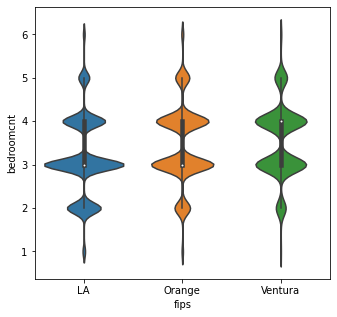

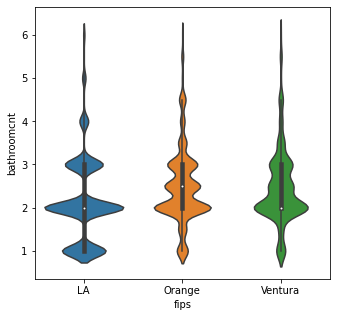

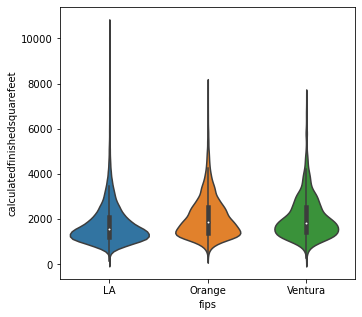

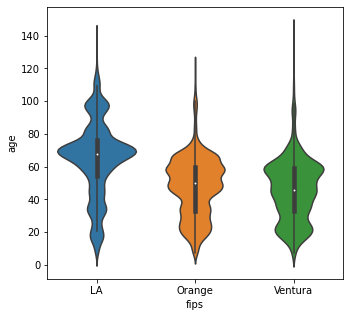

In [11]:
# Here I want to look at each county against my base variables 
explore.fips_vs_continuous_vars(train, interest_vars_base,['fips'])

Takeaways: 
- Most homes in LA county are 3 beds while homes in Orange county and Ventura county are more evenly distributed between 3 and 4 bedrooms
- Most homes either have 2 or 3 bathrooms, but LA county has a larger percentage houses with only one bathroom than the other two counties. 
- Homes in LA county tend to have a smaller average square foot size than homes in Ventura county and Orange county
- On average, homes in Ventura county and Orange county seem to be newer than homes in LA county



### Examine the relationship between age and tax value dollar count in each county.

#### Does the age of the home have an impact on the tax value dollar count?

Hypothesis

 H0= There is no relationship between age and taxvaluedollarcnt.

 H1= There is a relationship between age and taxvaluedollarcnt.

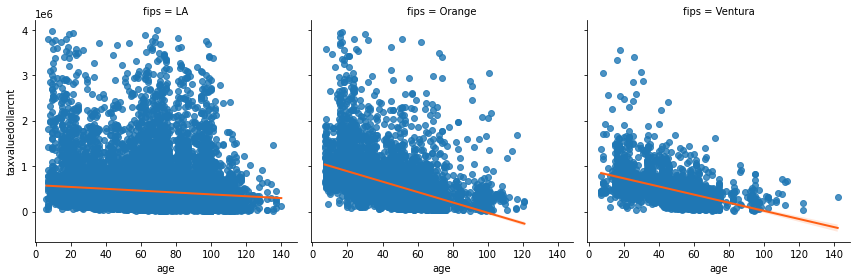

In [12]:
sns.lmplot(x = 'age', y = 'taxvaluedollarcnt', data = train, line_kws={'color': '#FF5E13', 'linewidth': 2}, height = 4, col = 'fips')

In [13]:
alpha = .05
corr, p = stats.pearsonr(train.age, train.taxvaluedollarcnt)
p< alpha, p, corr


(True, 3.0717e-319, -0.22170107312039883)

In [14]:
if p < alpha:
    print ('I reject the null hypothesis.')
else:
        print('I accept the null hypothesis.')

I reject the null hypothesis.


Takeaways: 
- There is a correlation between age and the tax value dollar count
- Properties in LA county seem to hold their value significantly better as they age versus properties in Orange county and Ventura county

### Examine the relationship between square feet and tax value dollar count in each county.

#### Does the square footage of the home have an impact on the tax value dollar count?

Hypothesis

 H0= There is no relationship between square footage and taxvaluedollarcnt.

 H1= There is a relationship between square footage and taxvaluedollarcnt.

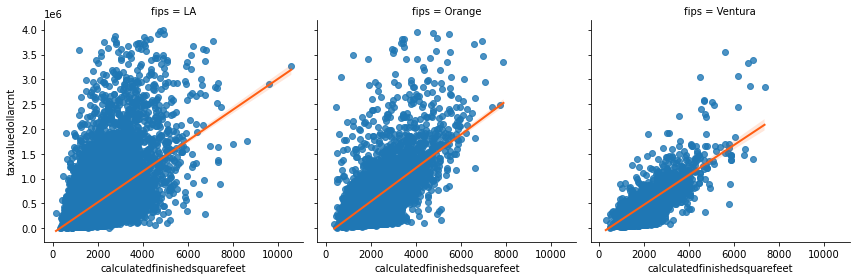

In [15]:
sns.lmplot(x = 'calculatedfinishedsquarefeet', y = 'taxvaluedollarcnt', data = train, line_kws={'color': '#FF5E13', 'linewidth': 2}, height = 4, col = 'fips')

In [16]:
corr, p = stats.pearsonr(train.calculatedfinishedsquarefeet, train.taxvaluedollarcnt)
p< alpha, p, corr


(True, 0.0, 0.6026034514097558)

In [17]:
if p < alpha:
    print ('I reject the null hypothesis.')
else:
        print('I accept the null hypothesis.')

I reject the null hypothesis.


Takeaways: 
- There is a correlation between square footage and the tax value dollar count

### Examine the relationship between number of bedrooms and tax value dollar count in each county.

#### Does the number of bedrooms of the home have an impact on the tax value dollar count?

Hypothesis

 H0= There is no relationship between the number of bedrooms and taxvaluedollarcnt.

 H1= There is a relationship between the number of bedrooms and taxvaluedollarcnt.

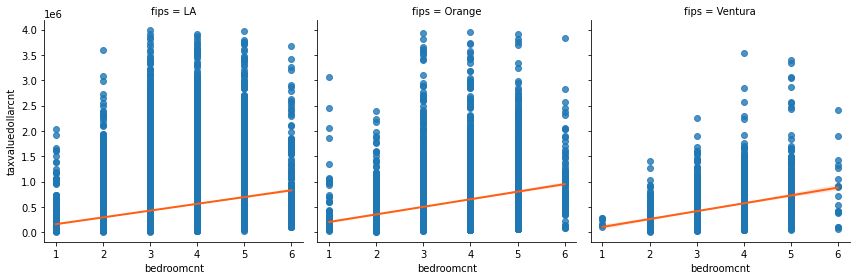

In [18]:
sns.lmplot(x = 'bedroomcnt', y = 'taxvaluedollarcnt', data = train, line_kws={'color': '#FF5E13', 'linewidth': 2}, height = 4, col = 'fips')

In [19]:
corr, p = stats.pearsonr(train.bedroomcnt, train.taxvaluedollarcnt)
p< alpha, p, corr

(True, 0.0, 0.27719643069472344)

In [20]:
if p < alpha:
    print ('I reject the null hypothesis.')
else:
        print('I accept the null hypothesis.')

I reject the null hypothesis.


Takeaways: 
- There is a correlation between number of bedrooms and the tax value dollar count

### Examine the relationship between county and tax value dollar count in each county.

#### Does the number of county have an impact on the tax value dollar count?

Hypothesis

 H0= There is no relationship between the county and taxvaluedollarcnt.

 H1= There is a relationship between the county and taxvaluedollarcnt.

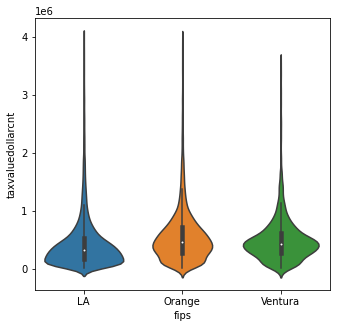

In [21]:
explore.fips_vs_continuous_vars(train, ['taxvaluedollarcnt'],['fips'])

In [22]:
corr, p = stats.pearsonr(train.fips2, train.taxvaluedollarcnt)
p< alpha, p, corr

(True, 7.607280261777359e-24, 0.05912448191990963)

In [23]:
if p < alpha:
    print ('I reject the null hypothesis.')
else:
        print('I accept the null hypothesis.')

I reject the null hypothesis.


Takeaways: 
- There is a correlation between the county the home is located in and the tax value dollar count of the home
- LA county actually seems to have a lower tax value dollar count than both Orange County and Ventura county

<div class="alert alert-block alert-success">
<b>Takeaways:</b> 
    
- The tax value dollar count of a property is related to the age of the property, the calculated square footage of the property, the bedroom count of the property, and which county the property is located in. 
    
- The calculated square footage of the property seems to have the strongest relationship with the tax value dollar count of the property, followed by bedroom count, then the age of the property, then the location of the property.
    
- It turns out that Orange county and Ventura county have higher average values for their tax value dollar count.  as expected.
</div>

# Modeling